A first attempt at using Twitterscraper, vaderSentiment, and langdetect packages, as described in a [YouTube video by Ken Jee](https://www.youtube.com/watch?v=_CS4u9cORwA).

In [1]:
import pandas as pd
import datetime as dt
from twitterscraper import query_tweets
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from langdetect import detect
import matplotlib.pyplot as plt
import seaborn as sns

INFO: {'User-Agent': 'Mozilla/5.0 (Windows; U; Windows NT 6.1; x64; fr; rv:1.9.2.13) Gecko/20101203 Firebird/3.6.13'}


In [3]:
def detector(x):
    try:
        return detect(x)
    except:
        None

In [4]:
#analyzer object initialize
analyzer = SentimentIntensityAnalyzer()

In [5]:
#set start and end dates for tweet scrapes
begin_date = dt.date(2019,3,3)
end_date = dt.date(2019,3,7)

In [6]:
begin_date_premier = dt.date(2019,3,7)
end_date_premier = dt.date(2019,3,9)

In [7]:
tweets_before = query_tweets("#CaptainMarvel", begindate = begin_date, enddate= end_date, limit=10000)
tweets_after = query_tweets("#CaptainMarvel", begindate = begin_date_premier, enddate = end_date_premier)

INFO: queries: ['#CaptainMarvel since:2019-03-03 until:2019-03-04', '#CaptainMarvel since:2019-03-04 until:2019-03-05', '#CaptainMarvel since:2019-03-05 until:2019-03-06', '#CaptainMarvel since:2019-03-06 until:2019-03-07']
INFO: Got 2501 tweets (2501 new).
INFO: Got 5007 tweets (2506 new).
INFO: Got 7513 tweets (2506 new).
INFO: Got 10027 tweets (2514 new).
INFO: queries: ['#CaptainMarvel since:2019-03-07 until:2019-03-08', '#CaptainMarvel since:2019-03-08 until:2019-03-09']
INFO: Got 1195 tweets (1195 new).
INFO: Got 2412 tweets (1217 new).


In [8]:
#convert these to a DataFrame
df_before = pd.DataFrame(t.__dict__ for t in tweets_before)
df_after = pd.DataFrame(t.__dict__ for t in tweets_after)

In [10]:
df_before.shape

(10027, 21)

In [11]:
df_after.shape

(2412, 21)

In [12]:
#filter for English
df_before['lang'] = df_before['text'].apply(lambda x:detector(x))
df_before = df_before[df_before['lang'] == 'en']
df_after['lang'] = df_after['text'].apply(lambda x:detector(x))
df_after = df_after[df_after['lang'] == 'en']

In [13]:
df_before.shape

(7678, 22)

In [14]:
df_after.shape

(1978, 22)

## Now begin the sentiment analysis

In [15]:
sentiment_before = df_before['text'].apply(lambda x: analyzer.polarity_scores(x))
sentiment_after = df_after['text'].apply(lambda x: analyzer.polarity_scores(x))

In [16]:
#sentiments to dataframe
df_before = pd.concat([df_before, sentiment_before.apply(pd.Series)], 1)
df_after = pd.concat([df_after, sentiment_before.apply(pd.Series)], 1)

In [17]:
#remove duplicates...are they bots or sponsored?
df_before.drop_duplicates(subset = 'text', inplace = True)
df_after.drop_duplicates(subset = 'text', inplace = True)

In [19]:
df_before.head()

,screen_name,username,user_id,tweet_id,tweet_url,timestamp,timestamp_epochs,text,text_html,links,...,replies,is_replied,is_reply_to,parent_tweet_id,reply_to_users,lang,neg,neu,pos,compound
0,spacecom,Parabolicarc.com,18928764,1103082716956831744,/spacecom/status/1103082716956831744,2019-03-05 23:59:48,1551830388,"Being so awesome, why does #CaptainMarvel neve...","<p class=""TweetTextSize js-tweet-text tweet-te...",[],...,2,True,False,,[],en,0.235,0.497,0.268,0.4455
1,mrxyvvs,💋,1482535506,1103082705468633088,/mrxyvvs/status/1103082705468633088,2019-03-05 23:59:45,1551830385,#CaptainMarvel showing na ba?????,"<p class=""TweetTextSize js-tweet-text tweet-te...",[],...,0,False,False,,[],en,0.000,1.000,0.000,0.0000
2,Seth_Everett,Seth Everett,46727908,1103082651769020416,/Seth_Everett/status/1103082651769020416,2019-03-05 23:59:33,1551830373,Thru the miracle that is #MarvelStudios in 2 d...,"<p class=""TweetTextSize js-tweet-text tweet-te...",[],...,1,True,False,,[],en,0.000,0.741,0.259,0.9118
3,tonyschaab,Tony Schaab,127503477,1103082600850173952,/tonyschaab/status/1103082600850173952,2019-03-05 23:59:20,1551830360,"It's time, O Captain my captain! #AdvanceScree...","<p class=""TweetTextSize js-tweet-text tweet-te...",[https://www.instagram.com/p/BupVwIaHCDd/?utm_...,...,0,False,False,,[],en,0.000,0.853,0.147,0.4753
4,Mukund_M27,𝖬ukund🔰🎋,2841113815,1103082592721526784,/Mukund_M27/status/1103082592721526784,2019-03-05 23:59:19,1551830359,seeking the bootleg version of #CaptainMarvel ...,"<p class=""TweetTextSize js-tweet-text tweet-te...",[],...,0,False,False,,[],en,0.000,0.692,0.308,0.4588


In [23]:
import matplotlib.pyplot as plt

C:\Users\corks\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\corks\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([  7.,   5.,   7.,  14.,  14.,   6.,  10.,  12.,  10.,  16.,  15.,
         10.,   8.,  17.,  22.,  15.,  18.,  25.,  10.,   4.,  16.,   3.,
         10.,   9., 460.,   5.,   8.,  10.,  18.,  12.,  13.,  18.,  25.,
         27.,  24.,  62.,  67.,  27.,  45.,  32.,  27.,  46.,  48.,  44.,
         51.,  43.,  44.,  29.,  36.,  14.]),
 array([-0.9671  , -0.928008, -0.888916, -0.849824, -0.810732, -0.77164 ,
        -0.732548, -0.693456, -0.654364, -0.615272, -0.57618 , -0.537088,
        -0.497996, -0.458904, -0.419812, -0.38072 , -0.341628, -0.302536,
        -0.263444, -0.224352, -0.18526 , -0.146168, -0.107076, -0.067984,
        -0.028892,  0.0102  ,  0.049292,  0.088384,  0.127476,  0.166568,
         0.20566 ,  0.244752,  0.283844,  0.322936,  0.362028,  0.40112 ,
         0.440212,  0.479304,  0.518396,  0.557488,  0.59658 ,  0.635672,
         0.674764,  0.713856,  0.752948,  0.79204 ,  0.831132,  0.870224,
         0.909316,  0.948408,  0.9875  ]),
 <a list of 50 Patch ob

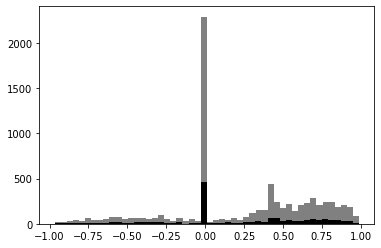

In [27]:
plt.hist(df_before['compound'], bins=50, color='grey')
plt.hist(df_after['compound'], bins=50, color='black')

In [29]:
%load_ext watermark
%watermark -v -p pandas,twitterscraper,matplotlib,seaborn,jupyterlab

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
CPython 3.7.7
IPython 5.8.0

pandas 1.0.2
twitterscraper 1.4.0
matplotlib 3.1.3
seaborn 0.10.0
jupyterlab 1.2.4
